In [14]:
import requests

download_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv'
response = requests.get(download_url)
response.raise_for_status()
target_csv = 'nba_all_elo.csv'

with open(target_csv, 'wb') as f:
    f.write(response.content)

In [15]:
import pandas as pd
nba = pd.read_csv(target_csv)

In [16]:
pd.set_option('display.max.columns', None)
pd.set_option('display.precision', 2)

In [17]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

In [18]:
import numpy as np
nba.describe(include=np.object)

,game_id,lg_id,date_game,team_id,fran_id,opp_id,opp_fran,game_location,game_result,notes
count,126314,126314,126314,126314,126314,126314,126314,126314,126314,5424
unique,63157,2,12426,104,53,104,53,3,2,231
top,200604150CHA,NBA,4/17/2013,BOS,Lakers,BOS,Lakers,H,W,at New York NY
freq,2,118016,30,5997,6024,5997,6024,63138,63157,440


In [19]:
nba.loc[nba["fran_id"] == "Lakers", "team_id"].value_counts()

LAL    5078
MNL     946
Name: team_id, dtype: int64

In [20]:
nba.loc[nba['team_id'] == 'MNL', 'date_game'].agg(('min', 'max'))

min    1/1/1949
max    4/9/1959
Name: date_game, dtype: object

In [21]:
nba.loc[nba['team_id'] == 'BOS', 'date_game'].agg(('min', 'max'))

min    1/1/1948
max    6/9/2012
Name: date_game, dtype: object

In [22]:
nba.loc[nba['team_id'] == 'BOS', 'pts'].sum()

626484

In [23]:
nba.loc[5555:5559, ['fran_id', 'pts', 'opp_pts', 'opp_fran']]

,fran_id,pts,opp_pts,opp_fran
5555,Pistons,83,56,Warriors
5556,Celtics,95,74,Knicks
5557,Knicks,74,95,Celtics
5558,Kings,81,86,Sixers
5559,Sixers,86,81,Kings


In [24]:
nba[nba['year_id'] > 2010].shape

(12658, 23)

In [25]:
nba[
    (nba['fran_id'] == 'Baltimore')
    & (nba['pts'] > 100)
    & (nba['opp_pts'] > 100)
]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
1726,864,194902260BLB,NBA,0,1949,2/26/1949,53,0,BLB,Baltimore,114,1421.94,1419.43,38.56,MNL,Lakers,115,1637.99,1640.49,H,L,0.34,NaN
4890,2446,195301100BLB,NBA,0,1953,1/10/1953,32,0,BLB,Baltimore,126,1328.67,1356.65,25.80,BOS,Celtics,105,1591.14,1563.17,H,W,0.28,NaN
4909,2455,195301140BLB,NBA,0,1953,1/14/1953,34,0,BLB,Baltimore,104,1349.83,1346.36,24.88,MNL,Lakers,112,1665.44,1668.91,H,L,0.22,NaN
5208,2605,195303110BLB,NBA,0,1953,3/11/1953,66,0,BLB,Baltimore,107,1284.52,1282.24,19.58,NYK,Knicks,113,1649.15,1651.44,H,L,0.18,at Boston MA
5825,2913,195402220BLB,NBA,0,1954,2/22/1954,60,0,BLB,Baltimore,110,1303.75,1301.97,20.74,BOS,Celtics,111,1591.49,1593.27,H,L,0.25,at Worcester MA


In [26]:
nba[
    (nba['year_id'] == 1992)
    & (nba['team_id'].str.startswith('LA'))
    & (nba['notes'].notna())
]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
68901,34451,199205030LAC,NBA,0,1992,5/3/1992,86,1,LAC,Clippers,115,1546.90,1556.0,47.89,UTA,Jazz,107,1647.51,1638.41,H,W,0.50,"at Anaheim, CA (Anaheim Convention Center)"
68903,34452,199205030LAL,NBA,0,1992,5/3/1992,86,1,LAL,Lakers,76,1489.65,1474.4,39.40,POR,Trailblazers,102,1655.12,1670.37,H,L,0.41,"at Las Vegas, NV"


In [27]:
nba[
    (nba['team_id'] == 'GSW')
    & (nba['year_id'] == 2015)
].groupby(['is_playoffs', 'game_result'])['game_id'].count()

is_playoffs  game_result
0            L              15
             W              67
1            L               5
             W              16
Name: game_id, dtype: int64

In [28]:
df = nba.copy()

In [29]:
df['difference'] = df['pts'] - df['opp_pts']

In [30]:
renamed_df = df.rename(columns={
    'game_result': 'result',
    'game_location': 'location'
})

In [31]:
elo_columns = ['elo_i', 'elo_n', 'opp_elo_i', 'opp_elo_n']
df = renamed_df.copy()
df = df.drop(elo_columns, axis=1)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   gameorder    126314 non-null  int64  
 1   game_id      126314 non-null  object 
 2   lg_id        126314 non-null  object 
 3   _iscopy      126314 non-null  int64  
 4   year_id      126314 non-null  int64  
 5   date_game    126314 non-null  object 
 6   seasongame   126314 non-null  int64  
 7   is_playoffs  126314 non-null  int64  
 8   team_id      126314 non-null  object 
 9   fran_id      126314 non-null  object 
 10  pts          126314 non-null  int64  
 11  win_equiv    126314 non-null  float64
 12  opp_id       126314 non-null  object 
 13  opp_fran     126314 non-null  object 
 14  opp_pts      126314 non-null  int64  
 15  location     126314 non-null  object 
 16  result       126314 non-null  object 
 17  forecast     126314 non-null  float64
 18  notes        5424 non-nu

In [33]:
df['date_game'] = pd.to_datetime(df['date_game'])

In [34]:
df['location'] = pd.Categorical(df['location'])

In [35]:
df['result'] = pd.Categorical(df['result'])

In [56]:
df[df['pts'] == 0]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,win_equiv,opp_id,opp_fran,opp_pts,location,result,forecast,notes,difference
26684,13343,197210260VIR,ABA,1,1973,1972-10-26,7,0,DNR,Nuggets,0,40.41,VIR,Squires,2,A,L,0.33,at Richmond VA; forfeit to VIR,-2


<AxesSubplot:xlabel='year_id'>

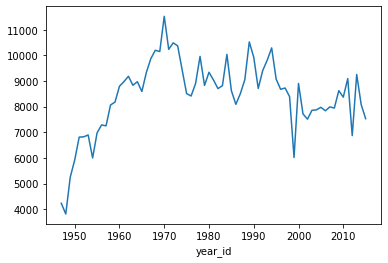

In [65]:
nba.loc[nba['fran_id'] == 'Knicks'].groupby('year_id')['pts'].sum().plot()

<AxesSubplot:ylabel='pts'>

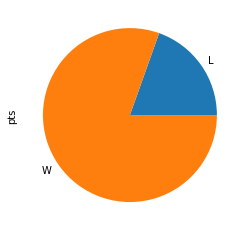

In [74]:
nba[
    (nba['fran_id'] == 'Heat')
    & (nba['year_id'] == 2013)
].groupby('game_result')['pts'].sum().plot(kind='pie')

In [37]:
revenues = pd.Series([5555, 7000, 1980])
city_employee_count = pd.Series({"Amsterdam": 5, "Tokyo": 8})
city_revenues = pd.Series(
        [4200, 8000, 6500],
        index=["Amsterdam", "Toronto", "Tokyo"]
)

In [38]:
city_data = pd.DataFrame({
    'revenue': city_revenues,
    'employee_count': city_employee_count})

In [39]:
city_data['revenue']

Amsterdam    4200
Tokyo        6500
Toronto      8000
Name: revenue, dtype: int64

In [40]:
city_data.loc[:, 'revenue']

Amsterdam    4200
Tokyo        6500
Toronto      8000
Name: revenue, dtype: int64

In [43]:
further_city_data = pd.DataFrame(
    {'revenue': [7000, 3400], 'employee_count': [2, 2]},
    index=['New York', 'Barcelona']
)

In [47]:
all_city_data = pd.concat([city_data, further_city_data], sort=False)

In [48]:
all_city_data

,revenue,employee_count
Amsterdam,4200,5.0
Tokyo,6500,8.0
Toronto,8000,NaN
New York,7000,2.0
Barcelona,3400,2.0


In [49]:
city_countries = pd.DataFrame({
    "country": ["Holland", "Japan", "Holland", "Canada", "Spain"],
    "capital": [1, 1, 0, 0, 0]},
    index=["Amsterdam", "Tokyo", "Rotterdam", "Toronto", "Barcelona"]
)

In [50]:
cities = pd.concat([city_countries, all_city_data], axis=1, sort=False)

In [53]:
city_countries

,country,capital
Amsterdam,Holland,1
Tokyo,Japan,1
Rotterdam,Holland,0
Toronto,Canada,0
Barcelona,Spain,0


In [54]:
all_city_data

,revenue,employee_count
Amsterdam,4200,5.0
Tokyo,6500,8.0
Toronto,8000,NaN
New York,7000,2.0
Barcelona,3400,2.0


In [55]:
cities

,country,capital,revenue,employee_count
Amsterdam,Holland,1.0,4200.0,5.0
Tokyo,Japan,1.0,6500.0,8.0
Rotterdam,Holland,0.0,NaN,NaN
Toronto,Canada,0.0,8000.0,NaN
Barcelona,Spain,0.0,3400.0,2.0
New York,NaN,NaN,7000.0,2.0
